# NLP Analysis of NFL Prospect Reports

In [15]:
# Basic Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scattertext as st
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
import nltk
from nltk.corpus import stopwords

/var/folders/_q/q0k0vyk516z58q89cytv2_380000gn/T/ipykernel_99277/3985584594.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [16]:
# Create a DataFrame from the player_bios.csv file
df = pd.read_csv('data/player_bios.csv')

df

,Player,Player Bio,Player Grades,Link,Player Category
0,Jadeveon Clowney,A physical specimen with a rare size-speed com...,7.50,https://www.nfl.com/prospects/jadeveon-clowney...,Perennial All-Pro
1,Sammy Watkins,A legitimate No. 1-caliber receiver who steppe...,7.10,https://www.nfl.com/prospects/sammy-watkins/32...,Pro Bowl Talent
2,Anthony Barr,"A highly disruptive, athletic specimen with th...",7.00,https://www.nfl.com/prospects/anthony-barr/320...,Pro Bowl Talent
3,Khalil Mack,A havoc-wreaking rush linebacker with the burs...,7.00,https://www.nfl.com/prospects/khalil-mack/3200...,Pro Bowl Talent
4,Jake Matthews,"Smart, tough, versatile franchise left tackle ...",7.00,https://www.nfl.com/prospects/jake-matthews/32...,Pro Bowl Talent
...,...,...,...,...,...
3964,Jeremy Webb,Webb is a Florida product but helped Stevenson...,5.50,https://www.nfl.com/prospects/jeremy-webb/3200...,Priority Undrafted Free Agent
3965,Russ Yeast,"Russ is the son of Craig Yeast, who was the SE...",5.50,https://www.nfl.com/prospects/russ-yeast/32005...,Priority Undrafted Free Agent
3966,Ken Marks,"Marks was known as ""Grandpa"" on the field as a...",5.49,https://www.nfl.com/prospects/ken-marks/32004d...,Priority Undrafted Free Agent
3967,Devin Wynn,Wynn was coached by former Georgia and NFL run...,5.46,https://www.nfl.com/prospects/devin-wynn/32005...,Priority Undrafted Free Agent


<Figure size 720x432 with 0 Axes>

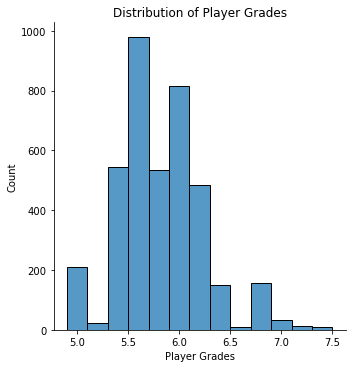

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a bar chart to show the distribution of the grades
plt.figure(figsize=(10, 6))
sns.displot(df['Player Grades'], bins=13, kde=False)
plt.title('Distribution of Player Grades')
plt.xlabel('Player Grades')
plt.ylabel('Count')
plt.show()

# Save the bar chart to the images folder
plt.savefig('images/grade_distribution.png')

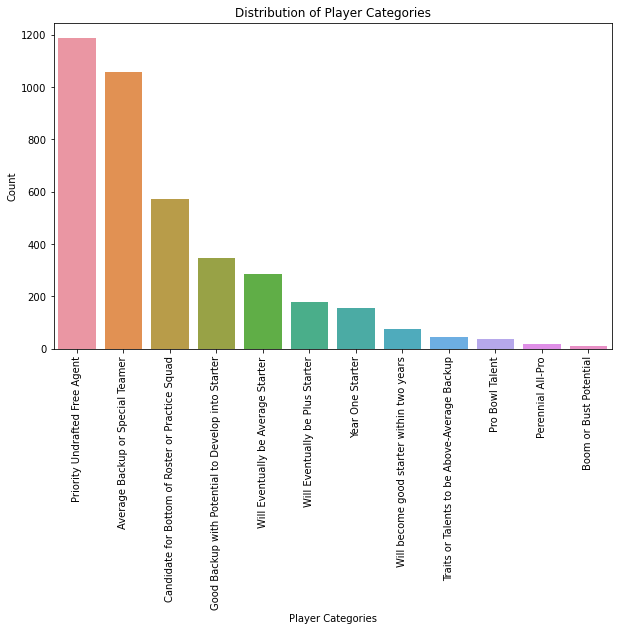

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a bar chart to show the distribution of the player categorie and order the bars by the count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Player Category', order=df['Player Category'].value_counts().index)
plt.title('Distribution of Player Categories')
plt.xlabel('Player Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Save the bar chart to the images folder
plt.savefig('images/player_category_distribution.png')

In [19]:
# Create a new column, called Prospect Class
# If the player's grade is Year One Starter or better, the player is NFL Ready, else Not NFL Ready
df['Player Class'] = np.where(df['Player Grades'] >= 6.7, 'starter', 'backup')

In [20]:
# Remove the stop words from the player bio
nltk.download('stopwords')
stop = stopwords.words('english')

df['Player Bio'] = df['Player Bio'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timothybryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Create a corpus
corpus = st.CorpusFromPandas(df,
                                category_col='Player Class',
                                text_col='Player Bio',
                                nlp=st.whitespace_nlp_with_sentences).build()

In [22]:
# Create a term frequency DataFrame
term_freq_df = corpus.get_term_freq_df()

In [23]:
term_freq_df

,starter freq,backup freq
term,,
a,38,401
physical,12,137
specimen,2,2
rare,9,27
size,17,253
...,...,...
huge effort,0,1
effort upon,0,1
return last,0,1


In [24]:
term_freq_df['starter_precision'] = term_freq_df['starter freq'] * 1./(term_freq_df['starter freq'] + term_freq_df['backup freq'])
term_freq_df['starter_freq_pct'] = term_freq_df['starter freq'] * 1./term_freq_df['starter freq'].sum()
term_freq_df['starter_hmean'] = term_freq_df.apply(lambda x: (hmean([x['starter_precision'], x['starter_freq_pct']])
                                                                   if x['starter_precision'] > 0 and x['starter_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df.sort_values(by='starter_hmean', ascending=False).iloc[:10]

,starter freq,backup freq,starter_precision,starter_freq_pct,starter_hmean
term,,,,,
all,413,5311,0.072152,0.009566,0.016893
team,407,5490,0.069018,0.009427,0.016589
he,297,5518,0.051075,0.006879,0.012126
tackles,265,4706,0.053309,0.006138,0.011009
year,254,3206,0.073410,0.005883,0.010894
first,236,2662,0.081435,0.005467,0.010245
games,244,6194,0.037900,0.005652,0.009837
s,226,2673,0.077958,0.005235,0.009811
5,212,3627,0.055223,0.004911,0.009019


In [25]:
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())


term_freq_df['starter_precision_normcdf'] = normcdf(term_freq_df['starter_precision'])
term_freq_df['starter_freq_pct_normcdf'] = normcdf(term_freq_df['starter_freq_pct'])
term_freq_df['starter_scaled_f_score'] = hmean([term_freq_df['starter_precision_normcdf'], term_freq_df['starter_freq_pct_normcdf']])
term_freq_df.sort_values(by='starter_scaled_f_score', ascending=False).iloc[:10]


,starter freq,backup freq,starter_precision,starter_freq_pct,starter_hmean,starter_precision_normcdf,starter_freq_pct_normcdf,starter_scaled_f_score
term,,,,,,,,
bednarik,10,3,0.769231,0.000232,0.000463,0.998760,0.996653,0.997706
hendricks,10,7,0.588235,0.000232,0.000463,0.987590,0.996653,0.992101
outland,9,7,0.562500,0.000208,0.000417,0.983540,0.992496,0.987998
outland trophy,9,7,0.562500,0.000208,0.000417,0.983540,0.992496,0.987998
mayfield,11,10,0.523810,0.000255,0.000509,0.975350,0.998611,0.986843
ferrell,7,1,0.875000,0.000162,0.000324,0.999752,0.969473,0.984379
chuck bednarik,7,3,0.700000,0.000162,0.000324,0.996803,0.969473,0.982948
ted hendricks,8,7,0.533333,0.000185,0.000370,0.977631,0.984326,0.980967
nagurski,9,9,0.500000,0.000208,0.000417,0.968781,0.992496,0.980495


In [26]:
term_freq_df['starter_corner_score'] = corpus.get_corner_scores('starter')
term_freq_df.sort_values(by='starter_corner_score', ascending=False).iloc[:10]

,starter freq,backup freq,starter_precision,starter_freq_pct,starter_hmean,starter_precision_normcdf,starter_freq_pct_normcdf,starter_scaled_f_score,starter_corner_score
term,,,,,,,,,
darnold,5,0,1.0,0.000116,0.000232,0.999971,0.905583,0.950439,0.990368
ruggs,5,0,1.0,0.000116,0.000232,0.999971,0.905583,0.950439,0.990368
finalist chuck,4,0,1.0,0.000093,0.000185,0.999971,0.849550,0.918644,0.990155
spence,4,0,1.0,0.000093,0.000185,0.999971,0.849550,0.918644,0.990155
okudah,4,0,1.0,0.000093,0.000185,0.999971,0.849550,0.918644,0.990155
cravens,4,0,1.0,0.000093,0.000185,0.999971,0.849550,0.918644,0.990155
peppers,3,0,1.0,0.000069,0.000139,0.999971,0.774867,0.873144,0.989688
metcalf,3,0,1.0,0.000069,0.000139,0.999971,0.774867,0.873144,0.989688
becton,3,0,1.0,0.000069,0.000139,0.999971,0.774867,0.873144,0.989688


In [27]:
# Generate a term frequency DataFrame
term_freq_df = corpus.get_term_freq_df()

term_freq_df['Starter Score'] = corpus.get_scaled_f_scores('starter')
term_freq_df['Backup Score'] = corpus.get_scaled_f_scores('backup')
pprint(term_freq_df.sort_values(by='Starter Score', ascending=False).head(10))


                starter freq  backup freq  Starter Score  Backup Score
term                                                                  
bednarik                  10            3       1.000000      0.000000
hendricks                 10            7       0.997433      0.002567
mayfield                  11           10       0.996340      0.003660
outland                    9            7       0.992709      0.007291
outland trophy             9            7       0.992709      0.007291
maxwell                    9            9       0.989245      0.010755
nagurski                   9            9       0.989245      0.010755
ted                        9           11       0.984775      0.015225
ted hendricks              8            7       0.983898      0.016102
lawrence                  13           20       0.983647      0.016353


In [35]:
html = produce_scattertext_explorer(corpus,
                                    category='starter',
                                    category_name='starter',
                                    not_category_name='backup',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=10,
                                    metadata=df['Player'],
                                    term_significance=st.LogOddsRatioUninformativeDirichletPrior())
file_name = 'html/NFLProspectsScattertextRankDefault.html'
open(file_name, 'wb').write(html.encode('utf-8'))

4028156